In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import random
%matplotlib inline  

In [49]:
def get_n_predictions(r, previous_points, number_of_neighbors, stock_name, real_points, dates):
    d = r
    half_p_d  = [half_p[i:i+d] for i in range(0, len(previous_points)-d, d)]
    #print(half_p_d[0])
    nbrs = NearestNeighbors(n_neighbors=number_of_neighbors, algorithm='ball_tree').fit(half_p_d)
    distances, indices = nbrs.kneighbors([half_p_d[-1]])
    index = random.choice(indices[0])
    points = [half_p[i:i+d] for i in range(0, len(previous_points)-d, d)]
    new_p = [half_p_d[-1][i] + half_p_d[index][i] - half_p_d[index - 1][i] for i in range(len(half_p_d[-1]))]

    points = np.append (points, [new_p], axis = 0)
    for n in range(10):
        distances, indices = nbrs.kneighbors([new_p])
        index = random.choice(indices[0])
        new_p = [new_p[i] + half_p_d[index][i] - half_p_d[index - 1][i] for i in range(len(new_p))]
        #print(new_p, half_p_3[indices[0][0]])
        points = np.append(points, [new_p], axis = 0)

    flatten = points.flatten()
    
    plt.plot(dates[:len(flatten)], real_points[:len(flatten)])
    plt.plot(dates[:len(flatten)], flatten)
    plt.legend(["Real Price", "Predicted"])
    plt.title(f'Stock Price Change from {str(dates[0])} to {str(dates[len(flatten) - 1])} for {stock_name} with r={r} and k={number_of_neighbors}')
    plt.show()
    return flatten

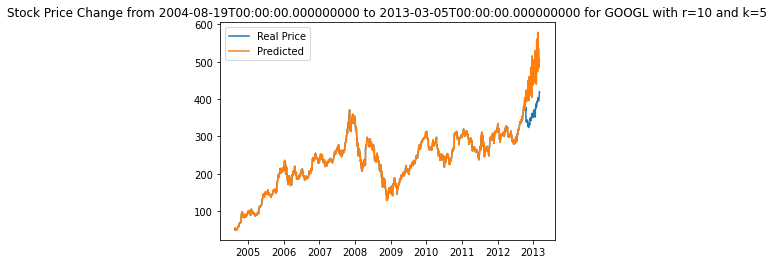

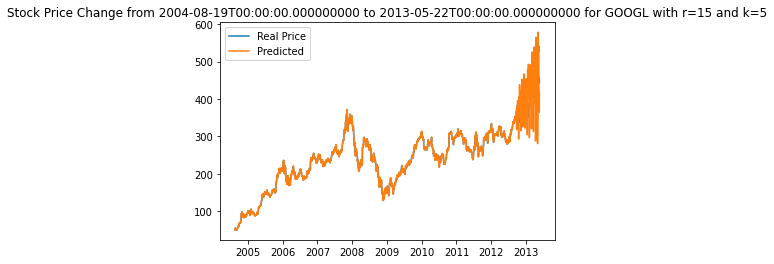

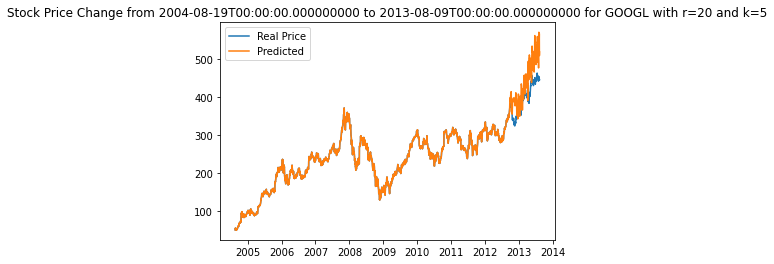

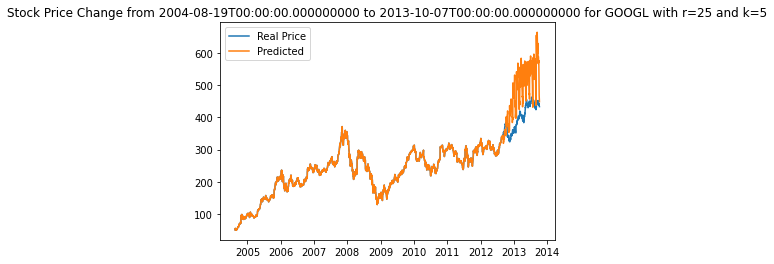

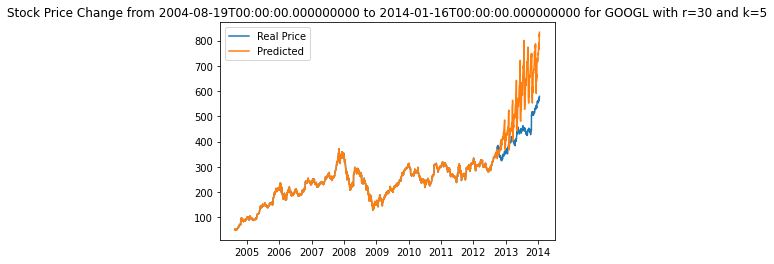

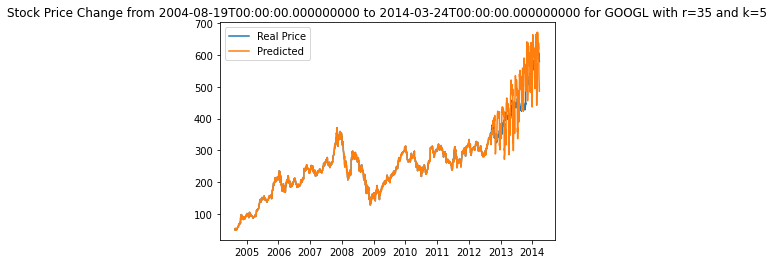

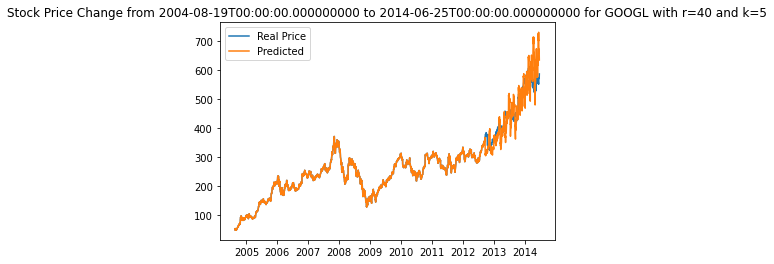

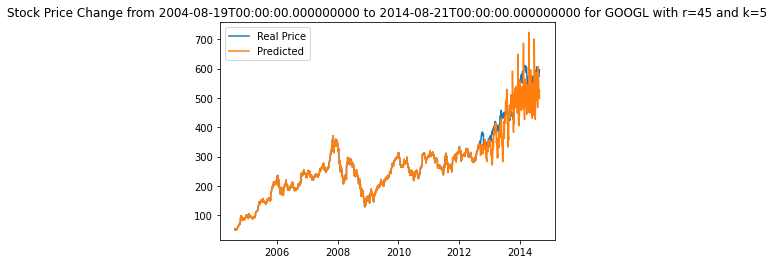

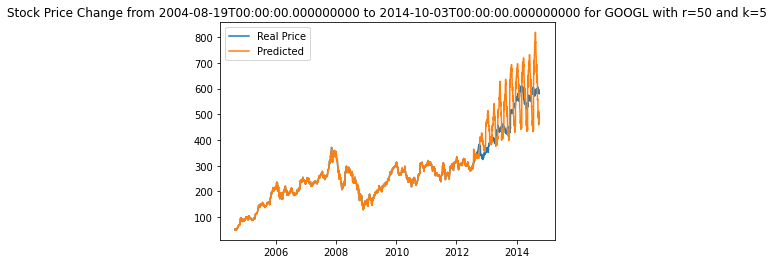

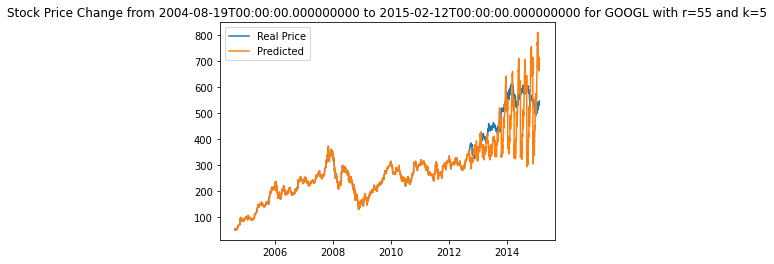

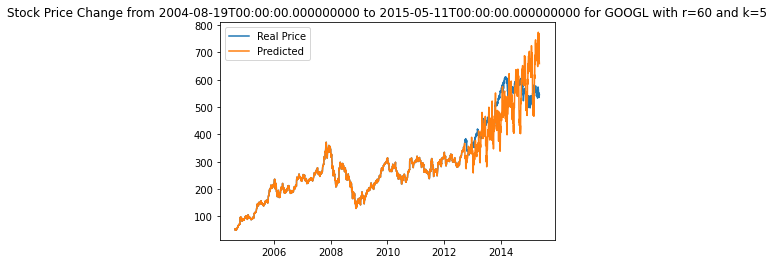

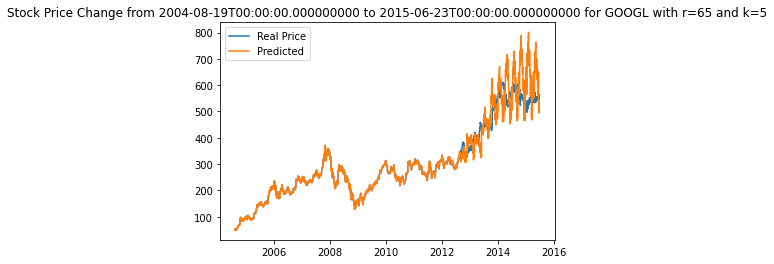

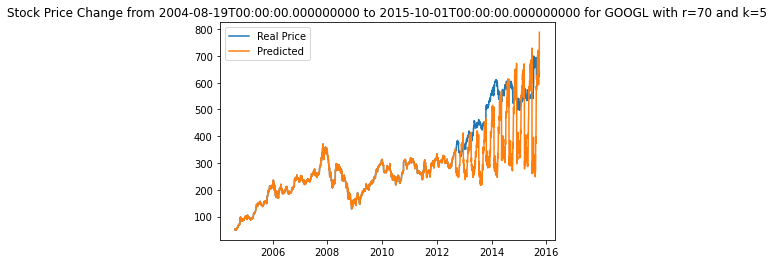

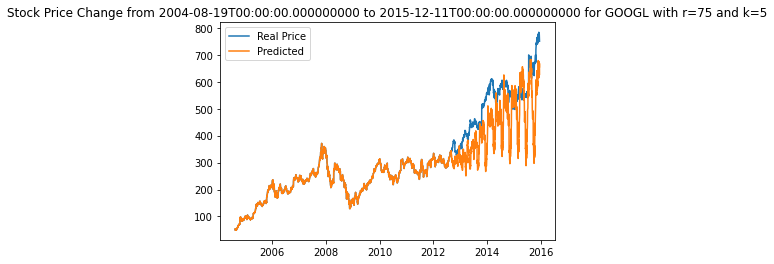

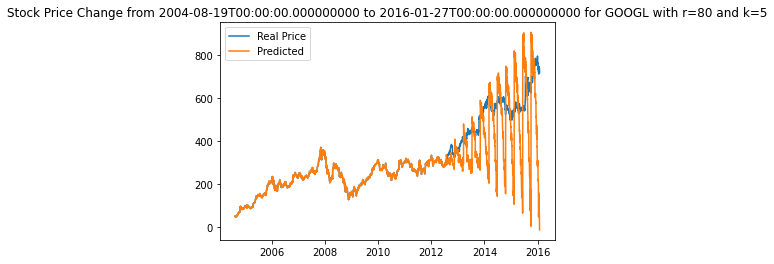

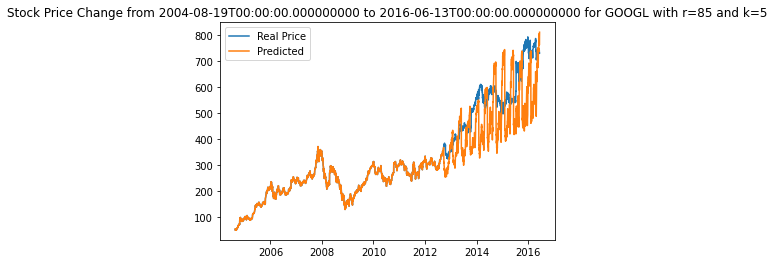

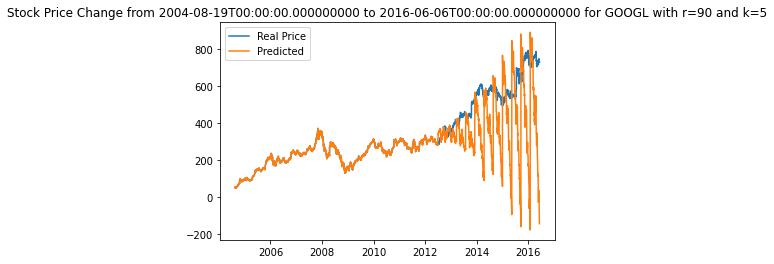

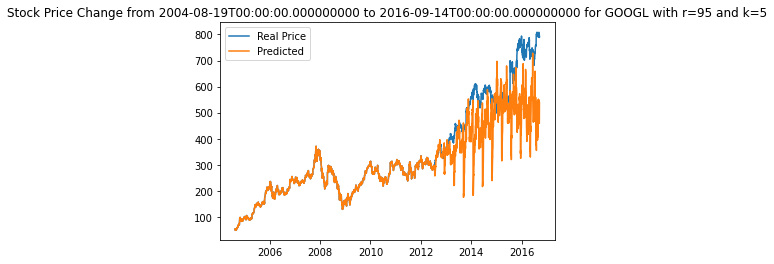

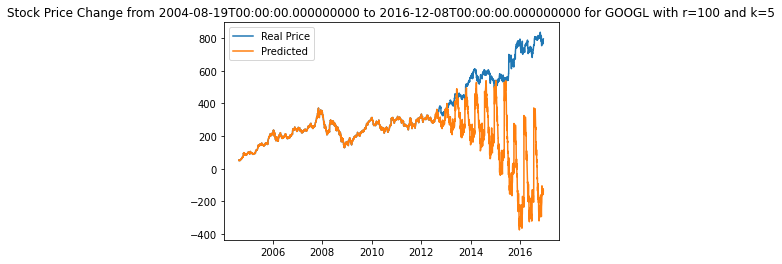

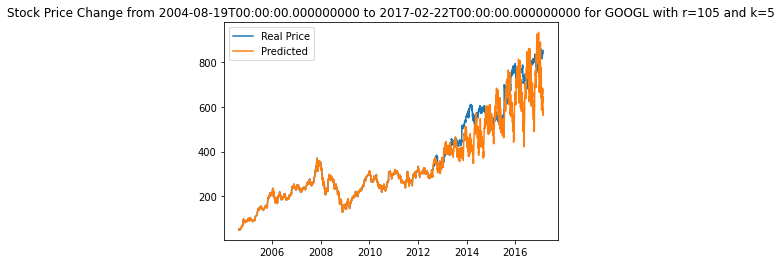

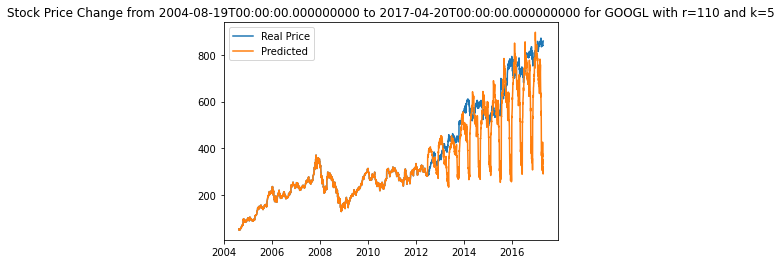

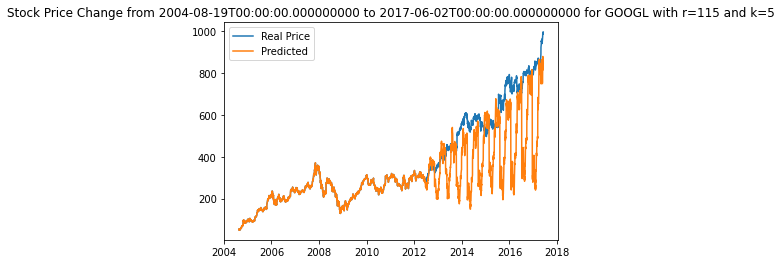

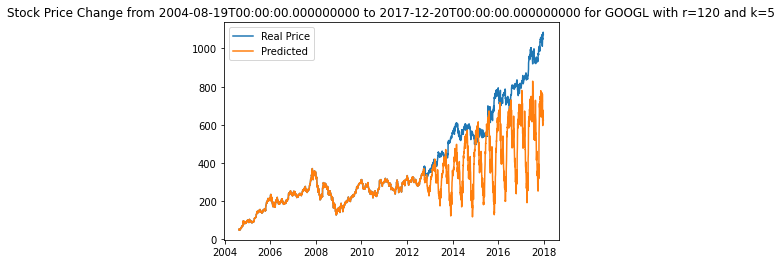

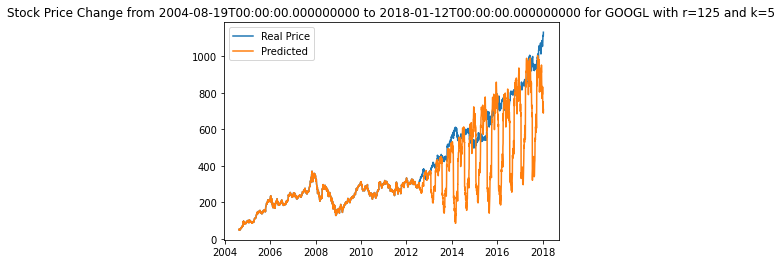

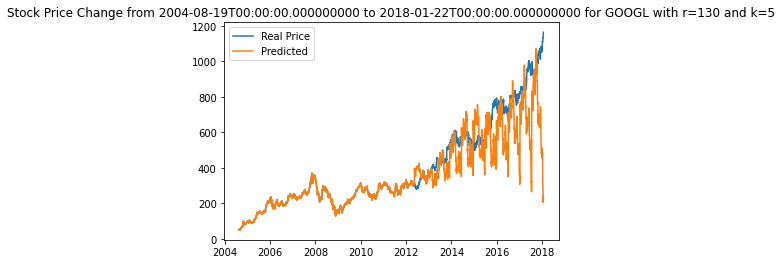

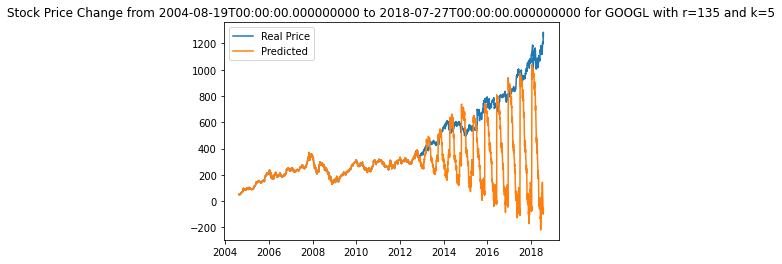

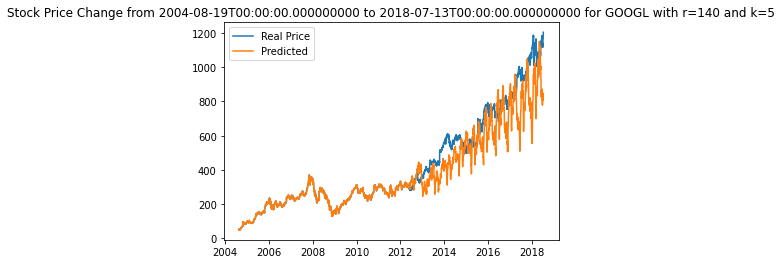

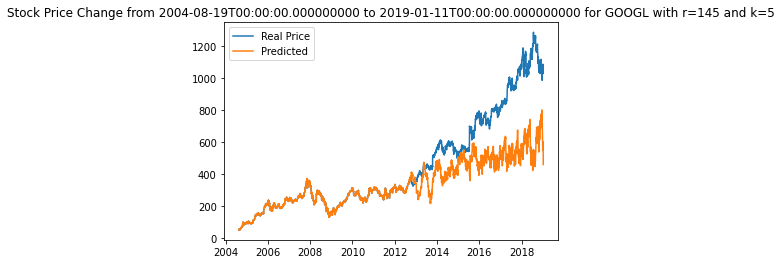

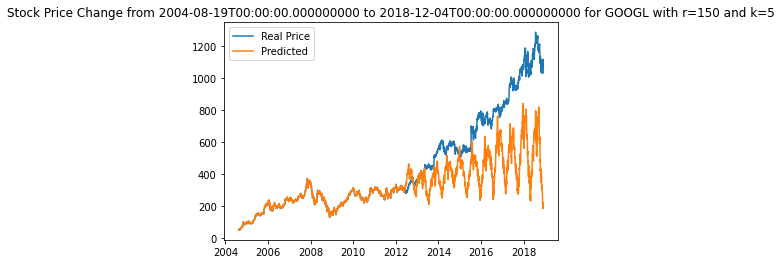

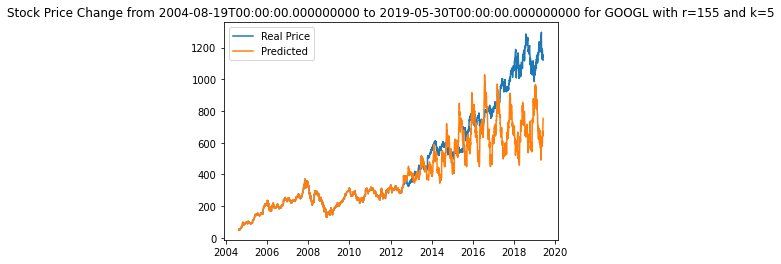

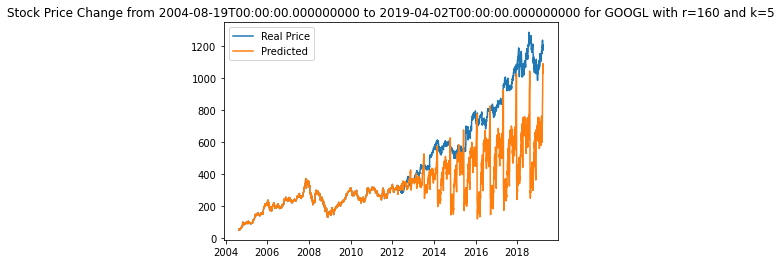

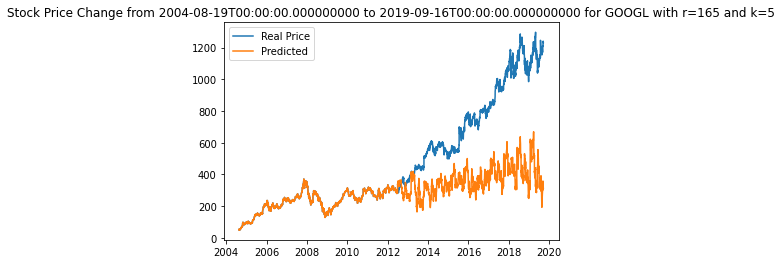

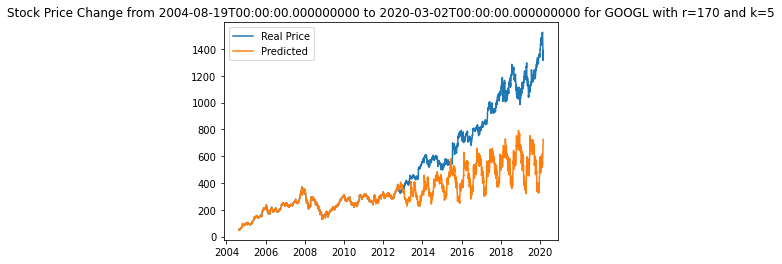

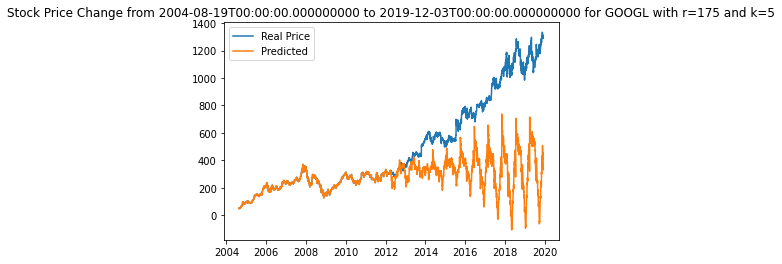

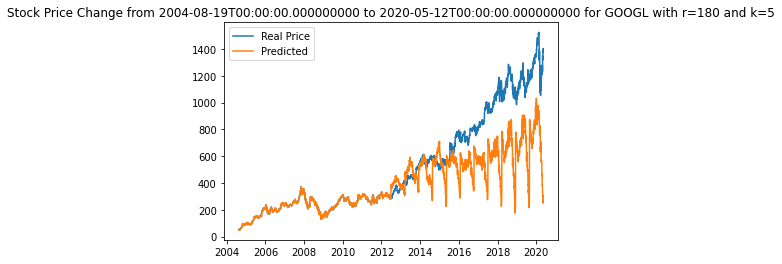

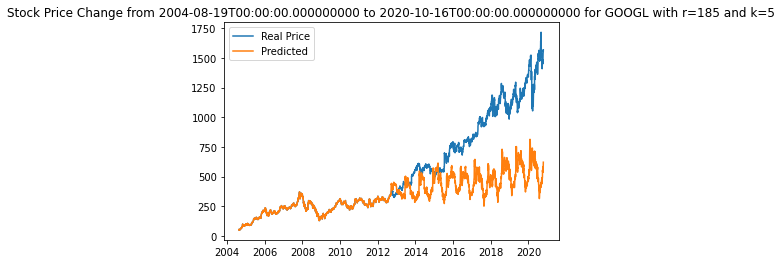

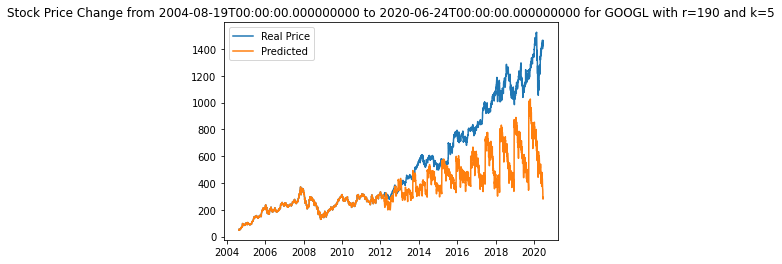

In [52]:
stock = yf.Ticker('GOOGL')
hist = stock.history(period="max")
close_p = hist['Close']
half_p = close_p.values[:int(len(close_p.values)/2)]
dates = hist.index.to_series().values
for i in range(10, 191, 5):
    get_n_predictions(i, half_p, 5, 'GOOGL', close_p, dates)

In [2]:
google = yf.Ticker('GOOGL')
hist = google.history(period="max")
name = 'Google'

In [3]:
open_p = hist['Open']
high_p = hist['High']
low_p = hist['Low']
close_p = hist['Close']
dates = hist.index.to_series().values
start_date = dates[0]
end_date = dates[-1]

In [9]:
half_p = close_p.values[:int(len(close_p.values)/2)]
all_p = close_p.values

In [10]:
half_p_3  = [half_p[i:i+3] for i in range(0, len(half_p)-3, 3)]

2047 682


In [20]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(half_p_3)
distances, indices = nbrs.kneighbors([half_p_3[-1]])

In [1]:
indices

NameError: name 'indices' is not defined

Text(0.5, 1.0, 'Stock Price Change from 2004-08-19T00:00:00.000000000 to 2020-11-20T00:00:00.000000000 for Google')

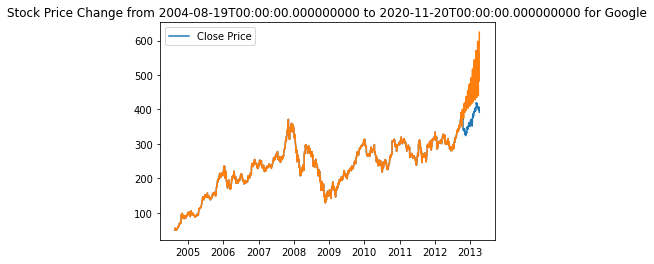

In [82]:
plt.plot(dates[:len(flatten)], close_p[:len(flatten)])
plt.plot(dates[:len(flatten)], flatten)
plt.legend(["Close Price"])
plt.title(f'Stock Price Change from {str(start_date)} to {str(end_date)} for {name}')

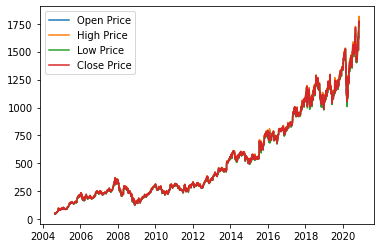

In [19]:
plt.plot(dates, open_p)
plt.plot(dates, high_p)
plt.plot(dates, low_p)
plt.plot(dates, close_p)
plt.legend(["Open Price", "High Price", "Low Price", "Close Price"])

In [66]:
len(half_p)

2047